# Plant Disease Recognition Model Training

This notebook trains a Convolutional Neural Network (CNN) to classify plant diseases from leaf images. The model can identify:
- **Healthy** leaves
- **Powdery** mildew disease
- **Rust** disease

## Overview
1. **Data Setup**: Download and prepare the dataset
2. **Data Exploration**: Analyze the dataset structure
3. **Data Preprocessing**: Apply augmentation and normalization
4. **Model Architecture**: Build CNN model
5. **Training**: Train with callbacks and monitoring
6. **Evaluation**: Visualize results and performance metrics
7. **Model Saving**: Save trained model for deployment

## 1. Setting Up Kaggle API and Dataset Download

First, we'll set up the Kaggle API and download the plant disease recognition dataset.

In [4]:
# Setting Up Kaggle API (Windows version)
import os
from pathlib import Path

# Create Kaggle directory in user home
kaggle_dir = Path.home() / '.kaggle'
kaggle_dir.mkdir(exist_ok=True)

# Copy kaggle.json to .kaggle directory (if it exists in current directory)
if os.path.exists('kaggle.json'):
    import shutil
    shutil.copy('kaggle.json', kaggle_dir / 'kaggle.json')
    print("✅ Kaggle API credentials copied successfully!")
else:
    print("⚠️ kaggle.json not found in current directory.")
    print("Please download your Kaggle API credentials from https://www.kaggle.com/account")
    print("and place kaggle.json in this directory, then run this cell again.")

✅ Kaggle API credentials copied successfully!


In [5]:
# Install Kaggle API if not already installed
!pip install kaggle

# Downloading Dataset
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

  Using cached charset_normalizer-3.4.3-cp310-cp310-win_amd64.whl (107 kB)
  Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)


You should consider upgrading via the 'E:\Agro_Chatbot\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0




  0%|          | 0.00/1.25G [00:00<?, ?B/s]
  3%|▎         | 35.0M/1.25G [00:00<00:03, 361MB/s]
  5%|▌         | 70.0M/1.25G [00:00<00:13, 97.1MB/s]
  7%|▋         | 88.0M/1.25G [00:01<00:18, 68.6MB/s]
 10%|▉         | 122M/1.25G [00:01<00:12, 95.7MB/s] 
 11%|█         | 136M/1.25G [00:01<00:12, 97.1MB/s]
 13%|█▎        | 166M/1.25G [00:01<00:09, 121MB/s] 
 14%|█▍        | 181M/1.25G [00:01<00:09, 126MB/s]
 15%|█▌        | 197M/1.25G [00:01<00:08, 134MB/s]
 17%|█▋        | 215M/1.25G [00:02<00:08, 128MB/s]
 18%|█▊        | 229M/1.25G [00:02<00:08, 131MB/s]
 19%|█▉        | 243M/1.25G [00:02<00:09, 110MB/s]
 20%|█▉        | 255M/1.25G [00:02<00:10, 97.6MB/s]
 21%|██        | 269M/1.25G [00:02<00:10, 97.3MB/s]
 23%|██▎       | 294M/1.25G [00:02<00:08, 118MB/s] 
 25%|██▍       | 314M/1.25G [00:02<00:08, 126MB/s]
 26%|██▌       | 333M/1.25G [00:03<00:07, 132MB/s]
 27%|██▋       | 346M/1.25G [00:03<00:07, 126MB/s]
 28%|██▊       | 359M/1.25G [00:03<00:07, 121MB/s]
 29%|██▉       | 371M/1.2

In [6]:
# Extracting the Dataset (Windows compatible)
import zipfile
import os

# Update paths for Windows local environment
dataset_zip = 'plant-disease-recognition-dataset.zip'
extract_to = 'plant_leaf_disease_predictor'

if os.path.exists(dataset_zip):
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"✅ Dataset extracted to {extract_to}")
else:
    print(f"⚠️ {dataset_zip} not found. Make sure the download completed successfully.")

✅ Dataset extracted to plant_leaf_disease_predictor


## 2. Dataset Exploration and Analysis

Let's explore the dataset structure and count the number of images in each category.

In [8]:
# Count of images in each subdirectory (Windows paths)
import os

def total_files(folder_path):
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        return num_files
    else:
        return 0

# Define paths for train, test, and validation sets (Windows local paths)
base_path = "plant_leaf_disease_predictor"

train_files_healthy = os.path.join(base_path, "Train", "Train", "Healthy")
train_files_powdery = os.path.join(base_path, "Train", "Train", "Powdery")
train_files_rust = os.path.join(base_path, "Train", "Train", "Rust")

test_files_healthy = os.path.join(base_path, "Test", "Test", "Healthy")
test_files_powdery = os.path.join(base_path, "Test", "Test", "Powdery")
test_files_rust = os.path.join(base_path, "Test", "Test", "Rust")

valid_files_healthy = os.path.join(base_path, "Validation", "Validation", "Healthy")
valid_files_powdery = os.path.join(base_path, "Validation", "Validation", "Powdery")
valid_files_rust = os.path.join(base_path, "Validation", "Validation", "Rust")

print(f"Dataset base path: {base_path}")
print(f"Checking if dataset exists: {os.path.exists(base_path)}")

Dataset base path: plant_leaf_disease_predictor
Checking if dataset exists: True


In [9]:
# Print dataset statistics
print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

# Calculate totals
total_train_images = total_files(train_files_healthy) + total_files(train_files_powdery) + total_files(train_files_rust)
total_test_images = total_files(test_files_healthy) + total_files(test_files_powdery) + total_files(train_files_rust)
total_validation_images = total_files(valid_files_healthy) + total_files(valid_files_powdery) + total_files(valid_files_rust)

print("========================================================")

print("Total number of training images:", total_train_images)
print("Total number of test images:", total_test_images)
print("Total number of validation images:", total_validation_images)

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20
Total number of training images: 1322
Total number of test images: 534
Total number of validation images: 60


### Sample Image Visualization

Let's display sample images from each class to understand the data better.

In [11]:
# Install required packages for image visualization
!pip install matplotlib pillow seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)


You should consider upgrading via the 'E:\Agro_Chatbot\venv\Scripts\python.exe -m pip install --upgrade pip' command.


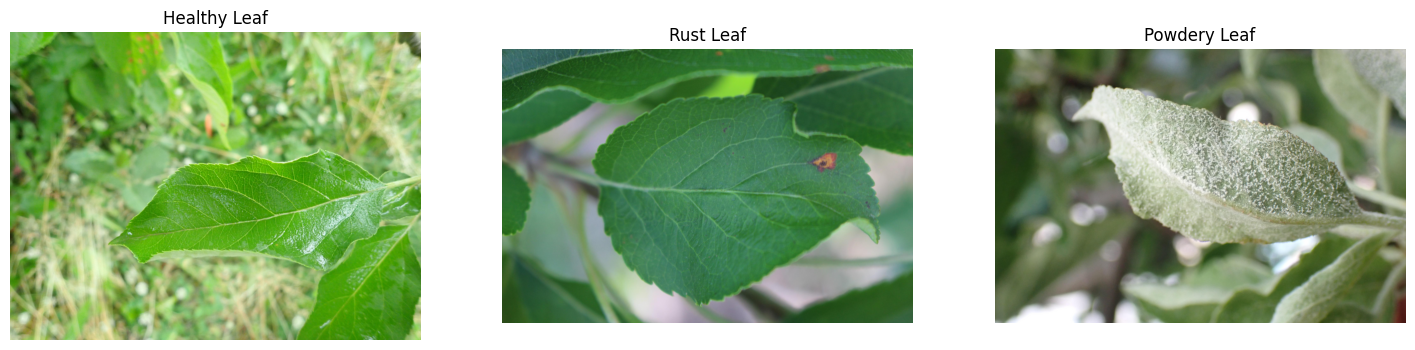

Sample images displayed successfully!


In [12]:
# Displaying Sample Images (Windows compatible paths)
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

# Function to find first available image in a directory
def find_first_image(directory_path):
    if os.path.exists(directory_path):
        image_extensions = ['*.jpg', '*.jpeg', '*.png']
        for ext in image_extensions:
            files = glob.glob(os.path.join(directory_path, ext))
            if files:
                return files[0]
    return None

# Find sample images from each class
img_path_healthy = find_first_image(train_files_healthy)
img_path_rust = find_first_image(train_files_rust)
img_path_powdery = find_first_image(train_files_powdery)

# Check if images were found and display them
if all([img_path_healthy, img_path_rust, img_path_powdery]):
    # Open the images
    img_healthy = Image.open(img_path_healthy)
    img_rust = Image.open(img_path_rust)
    img_powdery = Image.open(img_path_powdery)

    # Create a figure with 3 subplots (side by side)
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Display the healthy leaf image
    axs[0].imshow(img_healthy)
    axs[0].axis('off')  # Hide axes
    axs[0].set_title('Healthy Leaf')

    # Display the rust leaf image
    axs[1].imshow(img_rust)
    axs[1].axis('off')  # Hide axes
    axs[1].set_title('Rust Leaf')

    # Display the powdery leaf image
    axs[2].imshow(img_powdery)
    axs[2].axis('off')  # Hide axes
    axs[2].set_title('Powdery Leaf')

    # Show the plot
    plt.show()
    
    print("Sample images displayed successfully!")
else:
    print("⚠️ Could not find sample images. Please ensure the dataset is extracted properly.")
    print(f"Healthy: {img_path_healthy}")
    print(f"Rust: {img_path_rust}")
    print(f"Powdery: {img_path_powdery}")

## 3. Install Dependencies and Import Libraries

Let's install TensorFlow and import the necessary libraries for model building.

In [13]:
# Install or upgrade TensorFlow only
!pip install tensorflow --upgrade

  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl (331.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached wrapt-1.17.3-cp310-cp310-win_amd64.whl (38 kB)
  Using cached grpcio-1.75.1-cp310-cp310-win_amd64.whl (4.6 MB)
  Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached ml_dtypes-0.5.3-cp310-cp310-win_amd64.whl (206 kB)
  Using cached h5py-3.14.0-cp310-cp310-win_amd64.whl (2.9 MB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached optree-0.17.0-cp310-cp310-win_amd64.whl (304 kB)
  Using cached namex-0.1.0-py3-none-a

You should consider upgrading via the 'E:\Agro_Chatbot\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
# Verify TensorFlow installation
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Keras is now part of TensorFlow
keras_version = tf.keras.__version__
print("Keras version:", keras_version)

TensorFlow version: 2.20.0
Keras version: 3.11.3


## 4. Data Augmentation and Preprocessing

Data augmentation helps improve model generalization by creating variations of existing images.

In [15]:
# Data Augmentation and Preparation
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Stronger augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,          # Random rotation
    width_shift_range=0.1,      # Horizontal shift
    height_shift_range=0.1,     # Vertical shift
    brightness_range=[0.7, 1.3],# Vary brightness
    channel_shift_range=10      # Random color variation
)

# Validation data should only be rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Create data generators (Windows paths)
# Training generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, "Train", "Train"),
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, "Test", "Test"),
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


### Visualize Data Augmentation Effects

Let's see how data augmentation transforms our images.

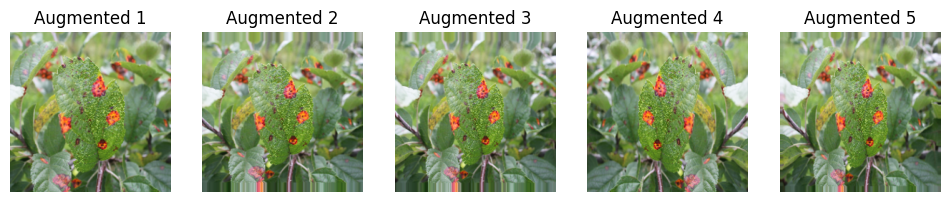

Data augmentation examples displayed!


In [17]:
# Visualize augmentation effects (Windows compatible)
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Find a sample image for augmentation demo
sample_img_path = find_first_image(test_files_rust)

if sample_img_path:
    # Load sample image
    img = load_img(sample_img_path, target_size=(225, 225))
    x = img_to_array(img)  
    x = np.expand_dims(x, axis=0)  # add batch dimension

    # Create the same ImageDataGenerator you used for training
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    # Generate and plot 5 augmented images
    plt.figure(figsize=(12, 6))
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(1, 5, i+1)  # 1 row, 5 columns
        plt.imshow(batch[0])
        plt.axis('off')
        plt.title(f'Augmented {i+1}')
        i += 1
        if i == 5:  # show 5 examples
            break
    plt.show()
    print("Data augmentation examples displayed!")
else:
    print("⚠️ No sample image found for augmentation demo.")

## 5. CNN Model Architecture

Building a Convolutional Neural Network with batch normalization and dropout for regularization.

In [18]:
# CNN Architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(225,225,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))   # Helps reduce overfitting
model.add(Dense(3, activation='softmax'))  # 3 classes: Healthy, Powdery, Rust

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall'])

# Display model architecture
model.summary()

e:\Agro_Chatbot\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 223, 223, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,243 (42.61 MB)

 Trainable params: 11,169,795 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

## 6. Model Training with Callbacks

Training the model with early stopping and learning rate reduction callbacks for optimal performance.

In [19]:
# Setup training with callbacks and class weights
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Optional: compute class weights (dataset is fairly balanced, but this can help)
train_labels = train_generator.classes
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(train_labels),
                                     y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

print("Training setup complete. Ready to train the model!")

Class weights: {0: np.float64(0.9621542940320232), 1: np.float64(1.0248062015503876), 2: np.float64(1.0153609831029187)}
Training setup complete. Ready to train the model!


In [22]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,                        # increased epochs for better learning
    validation_data=validation_generator,
    class_weight=class_weights_dict,  # optional, helps Rust class
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("Training completed!")

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 300s 7s/step - accuracy: 0.9002 - loss: 0.2923 - precision: 0.9388 - recall: 0.8699 - val_accuracy: 0.7000 - val_loss: 1.5412 - val_precision: 0.6980 - val_recall: 0.6933 - learning_rate: 5.0000e-04
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 257s 6s/step - accuracy: 0.9039 - loss: 0.2862 - precision: 0.9306 - recall: 0.8722 - val_accuracy: 0.8400 - val_loss: 0.5750 - val_precision: 0.8425 - val_recall: 0.8200 - learning_rate: 5.0000e-04
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 272s 6s/step - accuracy: 0.8949 - loss: 0.2864 - precision: 0.9371 - recall: 0.8676 - val_accuracy: 0.7667 - val_loss: 1.1288 - val_precision: 0.7862 - val_recall: 0.7600 - learning_rate: 5.0000e-04
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.9100 - loss: 0.2591 - precision: 0.9414 - recall: 0.8865 - val_accuracy: 0.8467 - val_loss: 0.6183 - val_precision: 0.8523 - val_recall: 0.8467 - learning_rate: 5.0000e-04
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - a

## 7. Training Visualization and Analysis

Visualizing the training metrics to understand model performance.

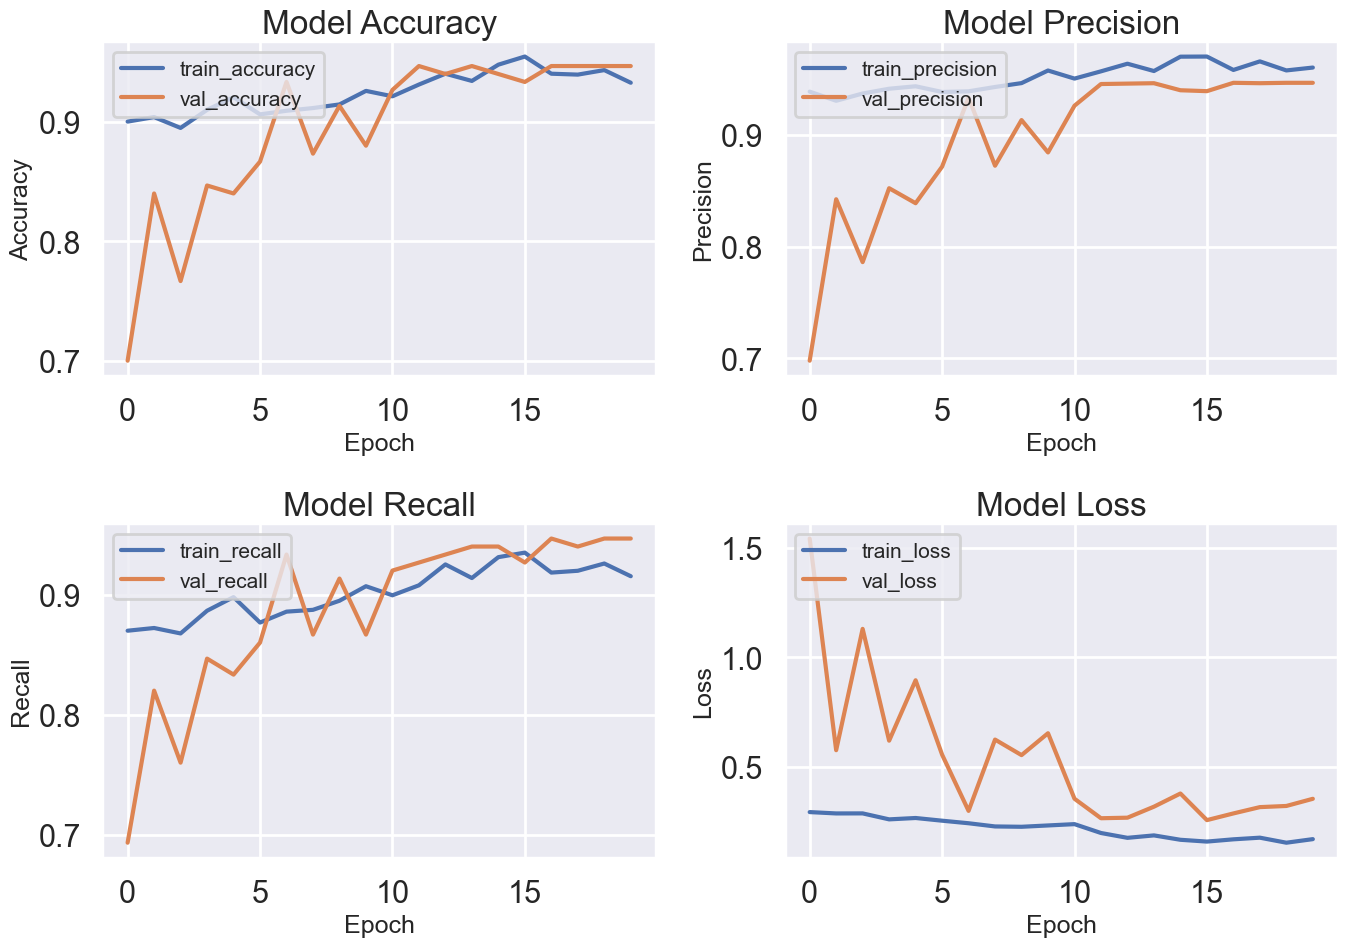

In [23]:
# Plot training history
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Set up seaborn for styling
sns.set_theme()
sns.set_context("poster")

# Create a figure to plot all metrics
figure(figsize=(14, 10), dpi=100)

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend(loc='upper left',fontsize=15)

# Plot precision
if 'precision' in history.history:
    plt.subplot(2, 2, 2)
    plt.plot(history.history['precision'], label='train_precision')
    plt.plot(history.history['val_precision'], label='val_precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch',fontsize=18)
    plt.ylabel('Precision',fontsize=18)
    plt.legend(loc='upper left',fontsize=15)

# Plot recall
if 'recall' in history.history:
    plt.subplot(2, 2, 3)
    plt.plot(history.history['recall'], label='train_recall')
    plt.plot(history.history['val_recall'], label='val_recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch',fontsize=18)
    plt.ylabel('Recall',fontsize=18)
    plt.legend(loc='upper left',fontsize=15)

# Plot loss
plt.subplot(2, 2, 4)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(loc='upper left',fontsize=15)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## 8. Model Saving and Testing

Save the trained model and test it on sample images.

In [24]:
# Saving the Model
model.save("model.h5")
print("Model saved as 'model.h5'")

Model saved as 'model.h5'


In [25]:
# Test the model on a sample image (Windows compatible)
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

# Find a sample image for testing
test_image_path = find_first_image(valid_files_powdery)

if test_image_path:
    # Load and preprocess the image
    x = preprocess_image(test_image_path)

    # Make predictions
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions[0])

    # Get class labels from train_generator
    labels = train_generator.class_indices
    labels = {v: k for k, v in labels.items()} # Invert the dictionary to map indices to labels

    predicted_label = labels[predicted_class]

    # Output the predicted label
    print(f'Test image: {os.path.basename(test_image_path)}')
    print(f'Predicted Label: {predicted_label}')
    print(f'Prediction Confidence: {predictions[0][predicted_class]:.4f}')
    
    # Show confidence for all classes
    print("\nAll class probabilities:")
    for idx, (class_name, prob) in enumerate(zip(labels.values(), predictions[0])):
        print(f"{class_name}: {prob:.4f}")
else:
    print("⚠️ No test image found. Please ensure the dataset is properly extracted.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Test image: 8f6737815b2cd234.jpg
Predicted Label: Powdery
Prediction Confidence: 1.0000

All class probabilities:
Healthy: 0.0000
Powdery: 1.0000
Rust: 0.0000


## 9. Model Evaluation with Confusion Matrix

Generate a confusion matrix to evaluate model performance across all classes.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


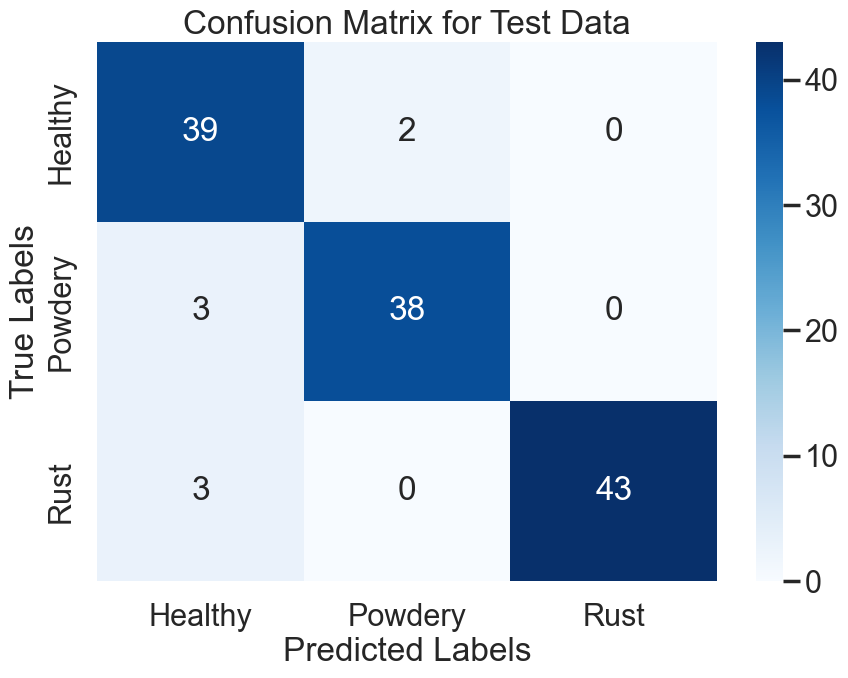

Test Accuracy: 0.9375


In [26]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions and true labels for the entire test dataset
def get_all_predictions_and_labels(generator):
    num_samples = generator.samples
    num_batches = num_samples // generator.batch_size
    all_predictions = []
    all_true_labels = []

    for _ in range(num_batches):
        images, labels = generator.__next__()
        predictions = model.predict(images)
        all_predictions.extend(np.argmax(predictions, axis=-1))
        all_true_labels.extend(np.argmax(labels, axis=-1))

    return np.array(all_true_labels), np.array(all_predictions)

# Get all predictions and true labels
true_labels, predicted_labels = get_all_predictions_and_labels(validation_generator)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure to plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

# Calculate accuracy
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
print(f"Test Accuracy: {accuracy:.4f}")